## Análisis de Correspondencia Multiple

In [1]:
library(readxl)
# Para listar las hojas que hay:
#excel_sheets(path="datasets/Malestar_ninos.xlsx")

malestar_niños<-suppressMessages(read_excel("datasets/Malestar_ninos.xlsx", sheet="Hoja1"))
malestar_niños<-as.data.frame(malestar_niños)
head(malestar_niños,n=5)

Edad,Tiempo,Sexo,Malestar,Nausea,Vomito,Abdominal,fiebre,Diarrea,Papas,Pescado,Mayonesa,Calabaza,Queso,Helado
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
9,22,F,Malestar_Si,Nausea_Si,Vomito_No,Abdominal_Si,Fiebre_Si,Diarrea_Si,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_Si,Helado_Si
5,0,F,Malestar_No,Nausea_no,Vomito_No,Abdominal_No,Fiebre_No,Diarrea_No,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_No,Helado_Si
6,16,F,Malestar_Si,Nausea_no,Vomito_Si,Abdominal_Si,Fiebre_Si,Diarrea_Si,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_Si,Helado_Si
9,0,F,Malestar_No,Nausea_no,Vomito_No,Abdominal_No,Fiebre_No,Diarrea_No,Papas_Si,Pescado_Si,Mayo_n,Calabaza_Si,Queso_Si,Helado_Si
7,14,M,Malestar_Si,Nausea_no,Vomito_Si,Abdominal_Si,Fiebre_Si,Diarrea_Si,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_Si,Helado_Si


Vemos el summary

In [2]:
summary(as.matrix(malestar_niños))

      Edad        Tiempo   Sexo          Malestar        Nausea  
  8     :10    0     :17   F:28   Malestar_No:17   Nausea_no:43  
  7     : 9   16     : 5   M:27   Malestar_Si:38   Nausea_Si:12  
  5     : 8   14     : 4                                         
  6     : 8   17     : 4                                         
  9     : 8    9     : 3                                         
 10     : 6   12     : 3                                         
 (Other): 6   (Other):19                                         
       Vomito          Abdominal        fiebre         Diarrea        Papas   
 Vomito_No:33   Abdominal_No:18   Fiebre_No:20   Diarrea_No:20   Papas_No: 3  
 Vomito_Si:22   Abdominal_Si:37   Fiebre_Si:35   Diarrea_Si:35   Papas_Si:52  
                                                                              
                                                                              
                                                                             

In [3]:
library(tidyr)
library(dplyr)
library(stringr)

malestar_niños_long <-
    head(malestar_niños,n=5) %>%
    gather(key="sintoma", value="valor", -c(Edad, Tiempo, Sexo)) %>%
    mutate(valor=tolower(valor)) %>%
    mutate(presente=str_extract(valor, "si|no"))    

malestar_niños_long[is.na(malestar_niños_long$presente),] <-
    malestar_niños_long[is.na(malestar_niños_long$presente),] %>%    
    mutate(presente=str_extract(valor, "_y|_n"))

malestar_niños_long <-
    malestar_niños_long %>%
    mutate(presente=ifelse( (presente=="si" | presente=="_y"),1,0))

malestar_niños_long <- malestar_niños_long[,-5]
malestar_niños_long


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Edad,Tiempo,Sexo,sintoma,presente
<dbl>,<dbl>,<chr>,<chr>,<dbl>
9,22,F,Malestar,1
5,0,F,Malestar,0
6,16,F,Malestar,1
9,0,F,Malestar,0
7,14,M,Malestar,1
9,22,F,Nausea,1
5,0,F,Nausea,0
6,16,F,Nausea,0
9,0,F,Nausea,0


In [4]:
#spread(data, key, value, fill = NA, convert = FALSE, drop = TRUE, sep = NULL)
 
malestar_niños_wide <-
    malestar_niños_long %>%
    spread(key=sintoma, value=presente)

In [5]:
sintomas <- malestar_niños_wide %>%
    select(everything(),-Edad, -Tiempo, -Sexo, -Malestar)

In [47]:
library(GDAtools)
suppressMessages(library(GGally))
columnas<-colnames(malestar_niños)
#malestar_niños
#total_columnas<-ncol(malestar_niños)
addmargins(burt(malestar_niños[,-c(1:4)]))

,Nausea.Nausea_no,Nausea.Nausea_Si,Vomito.Vomito_No,Vomito.Vomito_Si,Abdominal.Abdominal_No,Abdominal.Abdominal_Si,fiebre.Fiebre_No,fiebre.Fiebre_Si,Diarrea.Diarrea_No,Diarrea.Diarrea_Si,...,Pescado.Pescado_Si,Mayonesa.Mayo_n,Mayonesa.Mayo_y,Calabaza.Calabaza_No,Calabaza.Calabaza_Si,Queso.Queso_No,Queso.Queso_Si,Helado.Helado_No,Helado.Helado_Si,Sum
Nausea.Nausea_no,43,0,28,15,18,25,19,24,20,23,...,42,10,33,4,39,7,36,3,40,473
Nausea.Nausea_Si,0,12,5,7,0,12,1,11,0,12,...,12,0,12,1,11,0,12,1,11,132
Vomito.Vomito_No,28,5,33,0,17,16,18,15,17,16,...,32,9,24,1,32,6,27,3,30,363
Vomito.Vomito_Si,15,7,0,22,1,21,2,20,3,19,...,22,1,21,4,18,1,21,1,21,242
Abdominal.Abdominal_No,18,0,17,1,18,0,17,1,17,1,...,18,8,10,1,17,5,13,2,16,198
Abdominal.Abdominal_Si,25,12,16,21,0,37,3,34,3,34,...,36,2,35,4,33,2,35,2,35,407
fiebre.Fiebre_No,19,1,18,2,17,3,20,0,18,2,...,20,8,12,1,19,5,15,2,18,220
fiebre.Fiebre_Si,24,11,15,20,1,34,0,35,2,33,...,34,2,33,4,31,2,33,2,33,385
Diarrea.Diarrea_No,20,0,17,3,17,3,18,2,20,0,...,20,8,12,1,19,5,15,2,18,220
Diarrea.Diarrea_Si,23,12,16,19,1,34,2,33,0,35,...,34,2,33,4,31,2,33,2,33,385


Se prueba la independencia de las variables

In [50]:
library(FactoMineR)
catdes(malestar_niños[,-c(1:4)], num.var=1, proba=.05)$test.chi

,p.value,df
Diarrea,0.003060972,1
Abdominal,0.006284011,1
fiebre,0.022438640,1


In [51]:
catdes(malestar_niños[,-c(1:4)], num.var=2, proba=.05)$test.chi

,p.value,df
Abdominal,0.0002759485,1
fiebre,0.0005968699,1
Diarrea,0.0042249267,1
Mayonesa,0.0322843539,1


In [52]:
catdes(malestar_niños[,-c(1:4)], num.var=3, proba=.05)$test.chi

,p.value,df
fiebre,4.226082e-10,1
Diarrea,4.226082e-10,1
Vomito,2.759485e-04,1
Mayonesa,4.280164e-04,1
Nausea,6.284011e-03,1
Queso,1.949460e-02,1


In [53]:
catdes(malestar_niños[,-c(1:4)], num.var=4, proba=.05)$test.chi

,p.value,df
Diarrea,4.083663e-10,1
Abdominal,4.226082e-10,1
Vomito,5.968699e-04,1
Mayonesa,1.517584e-03,1
Nausea,2.243864e-02,1
Queso,3.897863e-02,1


Se realiza el MCA y el biplot

In [29]:
library(FactoMineR)
#head(malestar_niños)
# variables cuanti
# malestar_niños[,c(1:2)]
# variables cuali
# malestar_niños[,-c(1:2)]
malestar_niños_mca<-MCA(malestar_niños, quanti.sup=c(1:2), quali.sup=c(3:4))
malestar_niños_mca

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 55 individuals, described by 15 variables
*The results are available in the following objects:

   name                description                                           
1  "$eig"              "eigenvalues"                                         
2  "$var"              "results for the variables"                           
3  "$var$coord"        "coord. of the categories"                            
4  "$var$cos2"         "cos2 for the categories"                             
5  "$var$contrib"      "contributions of the categories"                     
6  "$var$v.test"       "v-test for the categories"                           
7  "$ind"              "results for the individuals"                         
8  "$ind$coord"        "coord. for the individuals"                          
9  "$ind$cos2"         "cos2 for the individuals"                            
10 "$ind$contrib"      "contribution

In [30]:
library(FactoMineR)
malestar_niños_mca2<-MCA(malestar_niños[,-c(1:2)], graph=F)
malestar_niños_mca2

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 55 individuals, described by 13 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$ind"            "results for the individuals"     
8  "$ind$coord"      "coord. for the individuals"      
9  "$ind$cos2"       "cos2 for the individuals"        
10 "$ind$contrib"    "contributions of the individuals"
11 "$call"           "intermediate results"            
12 "$call$marge.col" "weights of columns"              
13 "$call$marge.li"  "weights of rows"                 

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


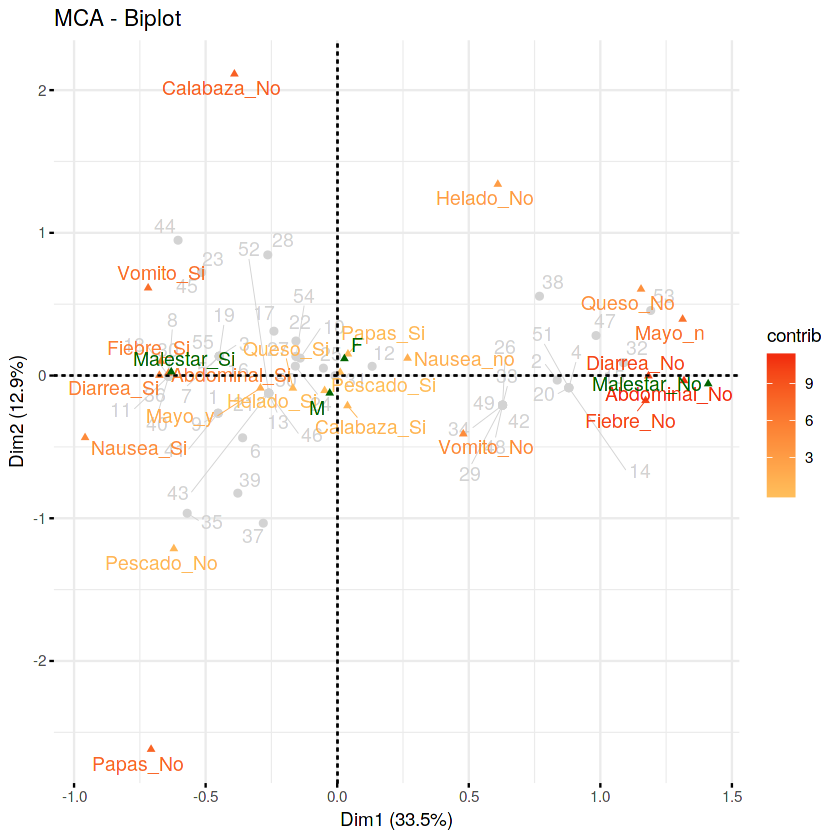

In [61]:
library(factoextra)
fviz_mca_biplot(
    malestar_niños_mca,
    repel = TRUE,
    gradient.cols = c('#FFBD5A', '#F22D0F'),    
    col.var = "contrib", # Color variable por contribución    
    col.ind = "#D3D3D3", # Color individuo
    shape.row = 1, 
    shape.col = 4,
    # Dibujar flecha para c(ROW,COLUMN)
    #arrow = c(FALSE, TRUE)
)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


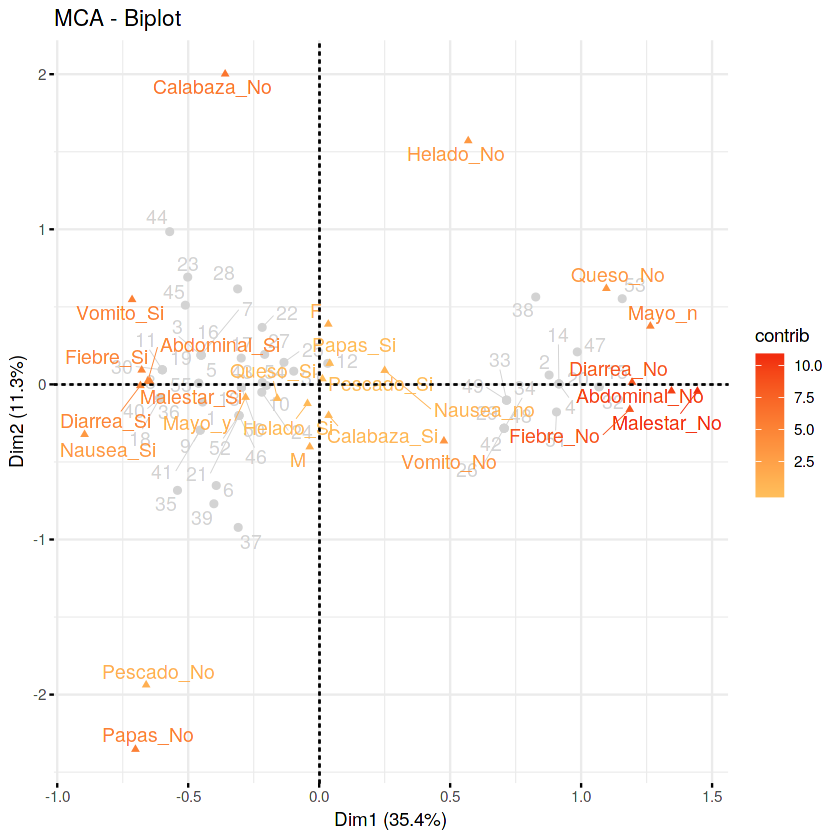

In [62]:
library(factoextra)
fviz_mca_biplot(
    malestar_niños_mca2,
    repel = TRUE,
    gradient.cols = c('#FFBD5A', '#F22D0F'),    
    col.var = "contrib", # Color variable por contribución    
    col.ind = "#D3D3D3", # Color individuo
    shape.row = 1, 
    shape.col = 4,
    # Dibujar flecha para c(ROW,COLUMN)
    #arrow = c(FALSE, TRUE)
)

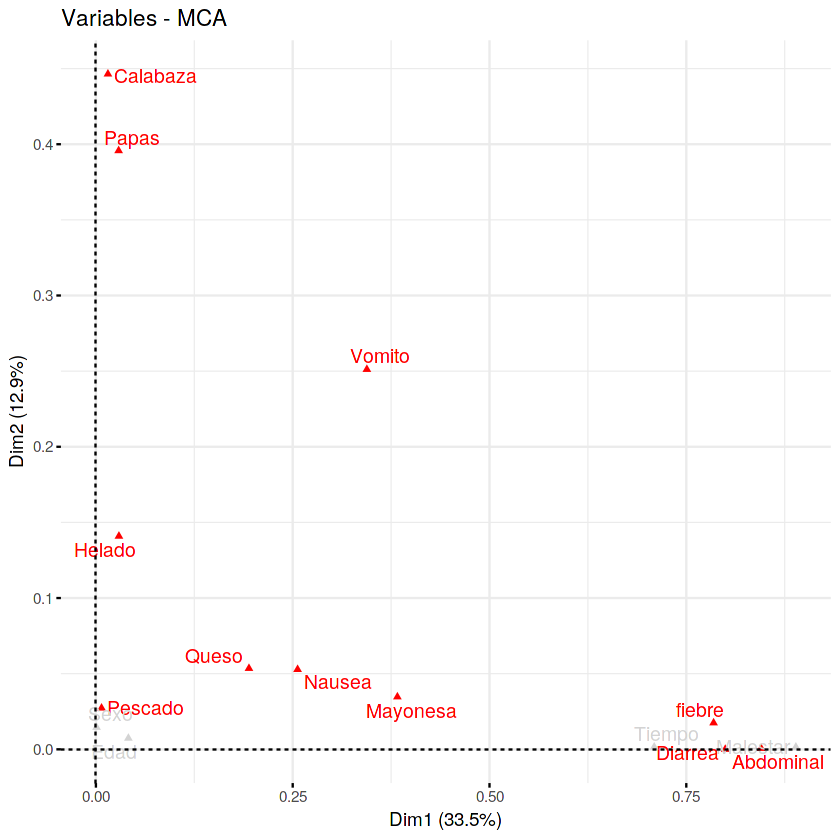

In [69]:
library(factoextra)
# Graficando las variables
fviz_mca_var(
    malestar_niños_mca,
    choice = "mca.cor",
    repel = TRUE,
    col.quanti.sup = "#D3D3D3"
)

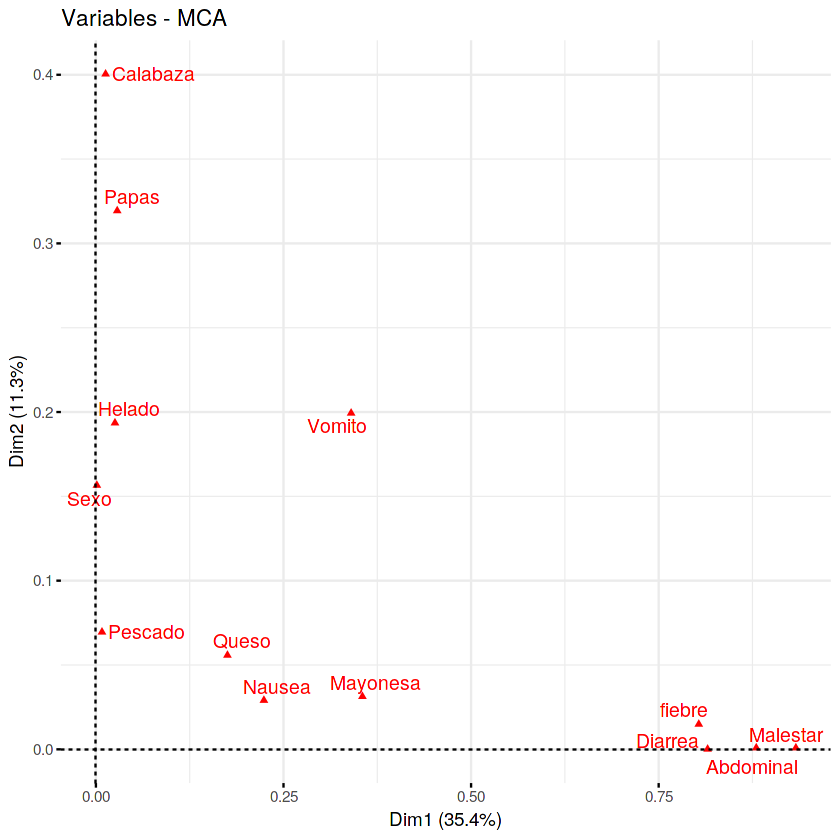

In [66]:
library(factoextra)
# Graficando las variables
fviz_mca_var(
    malestar_niños_mca2,
    choice = "mca.cor",
    repel = TRUE
)

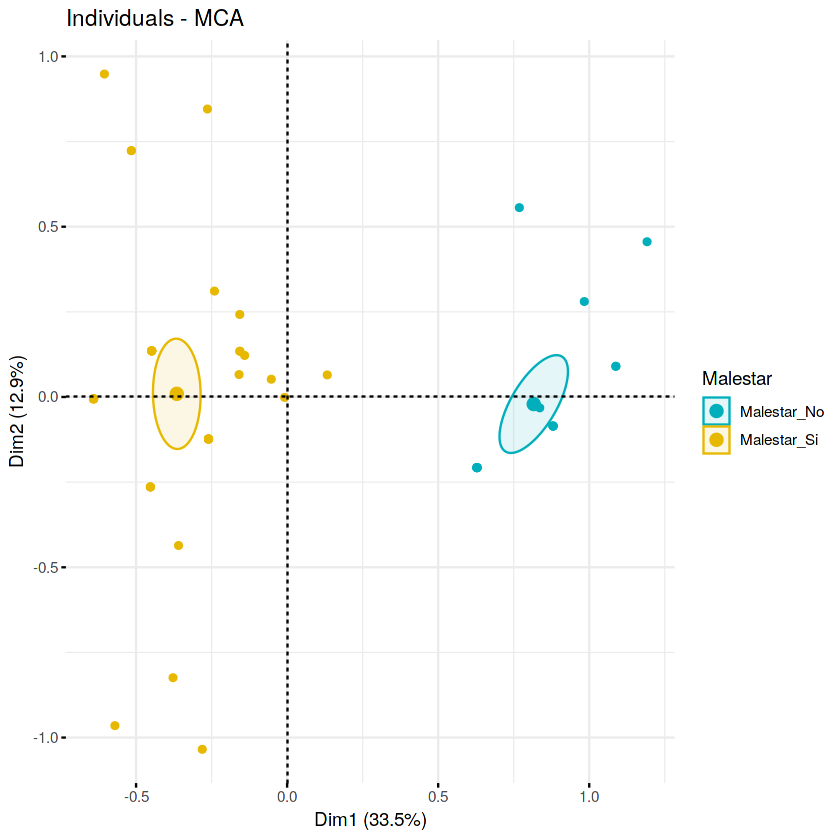

In [72]:
fviz_mca_ind(
    malestar_niños_mca, 
    label = "none", # hide individual labels
    habillage = "Malestar", # color by groups 
    palette = c("#00AFBB", "#E7B800"),
    addEllipses = TRUE, ellipse.type = "confidence",
    ggtheme = theme_minimal()
)

In [83]:
fviz_ellipses(
    malestar_niños_mca,    
    #c("Vomito", "fiebre"),
    geom = "point"
)

ERROR: Error in .add_ind_groups(X, df, habillage): argument "habillage" is missing, with no default


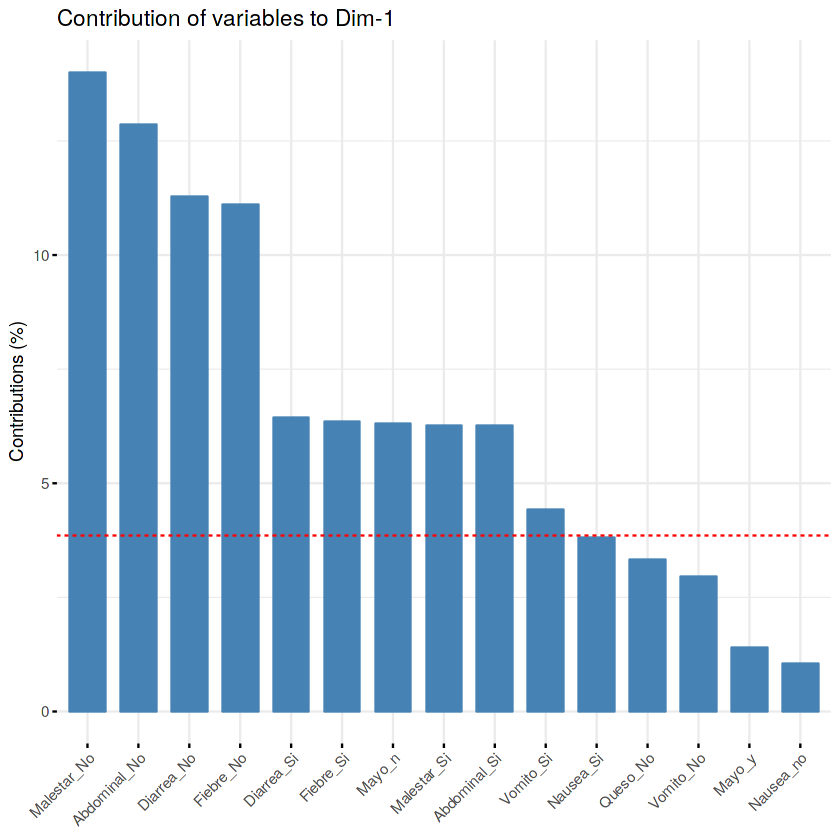

In [76]:
fviz_contrib(malestar_niños_mca2, choice = "var", axes = 1, top = 15)

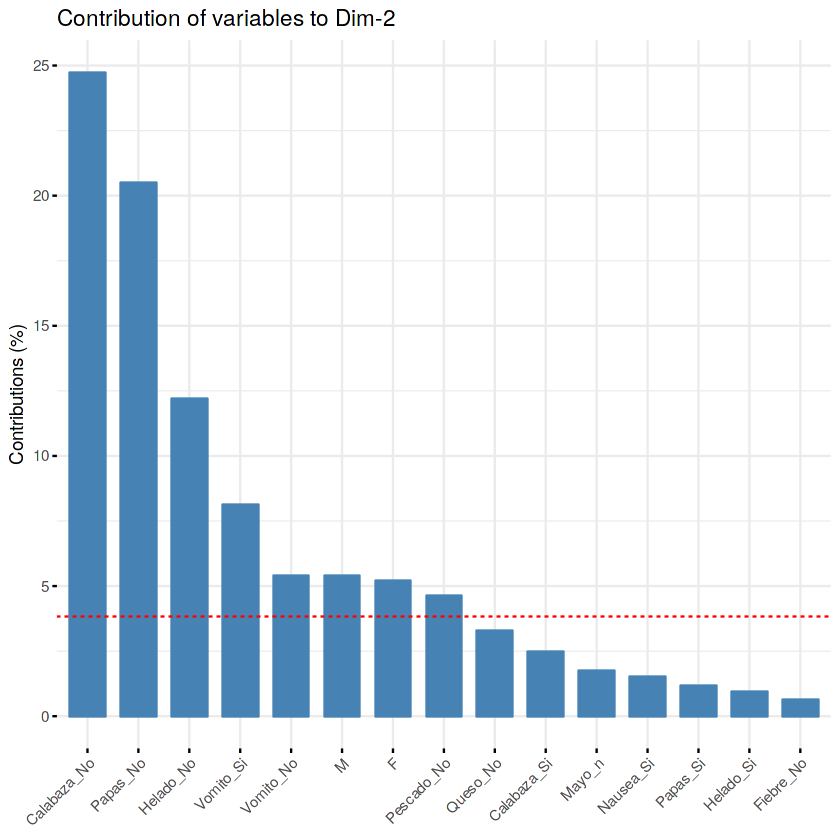

In [77]:
fviz_contrib(malestar_niños_mca2, choice = "var", axes = 2, top = 15)

In [82]:
malestar_niños_mca$var$coord

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_no,0.26739087,0.121390290,-0.265583253,0.03376130,0.073704999
Nausea_Si,-0.95815062,-0.434981874,0.951673323,-0.12097801,-0.264109581
Vomito_No,0.47902794,-0.409194649,0.084492799,0.27361142,0.052452504
Vomito_Si,-0.71854191,0.613791974,-0.126739198,-0.41041713,-0.078678757
Abdominal_No,1.31802207,-0.035745005,-0.005094243,-0.15360951,-0.069869870
Abdominal_Si,-0.64119993,0.017389462,0.002478280,0.07472895,0.033990747
Fiebre_No,1.17183098,-0.174895110,0.097275290,-0.18967098,-0.018478570
Fiebre_Si,-0.66961770,0.099940063,-0.055585880,0.10838342,0.010559183
Diarrea_No,1.18282245,-0.002756840,-0.082979839,-0.24123007,-0.104910816
Diarrea_Si,-0.67589854,0.001575337,0.047417051,0.13784575,0.059949038
